In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import statsmodels.api as sm
from script import *

%matplotlib inline

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
plt.rc('figure', figsize=(18.0, 6.0))

In [4]:
#function to load dataframe for building
def load_building(building_id, start, end):
    
    df = pickle.load(open('pickle_files/df_{}.p'.format(building_id), 'rb'))
    df = df.sort_values('localhour', ascending=True)
    df.index = pd.to_datetime(df.apply(strip_tz, axis=1))
    df = df.rename(columns={'use':'Hourly_Usage'})
    df = df.loc[start:end,['localhour','Hourly_Usage']]
    
    return df

In [3]:
df = load_building(545, '2016-10-24 00:00:00', '2016-10-28 00:00:00')

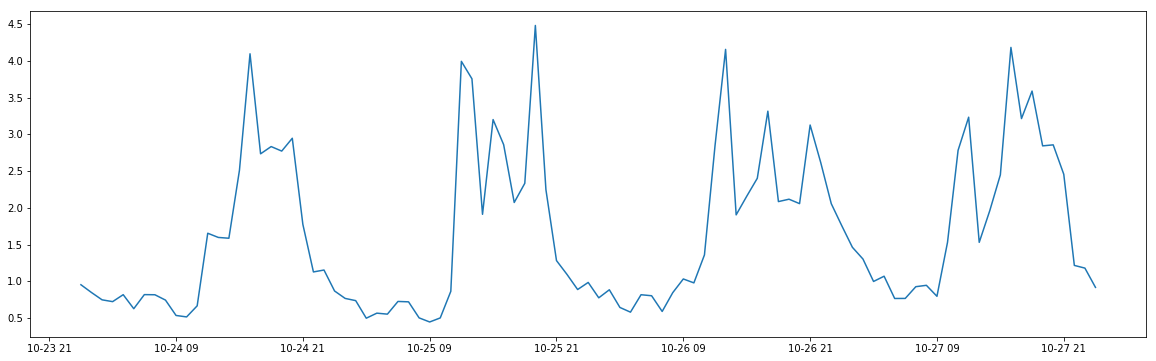

In [4]:
#plot electricity usage 
plt.subplots(1,1,figsize=(20,6))
plt.plot(df.index, df.Hourly_Usage)

## AR models

In [7]:
#function to plot AR time series model with actual usage
def plot_ar_model(data, model, ar_value, building_name):

    x = data.localhour
    y_true = data.Hourly_Usage

    #plot actual usage
    plt.subplots(1,1,figsize=(20,6))
    plt.plot(x,y_true, label='Hourly_Usage')

    x_pred = x[ar_value:]
    y_pred = model.predict()

    #plot model prediction with AR
    plt.plot(x_pred,y_pred, color='red', label='AR')

    plt.title("Electricity Usage of Building {} AR-{}".format(building_name, ar_value))
    plt.xlabel("Date-Time", fontsize=16)
    plt.ylabel("Energy Consumption (kWh)", fontsize=16)
    plt.legend()

AR-1

In [46]:
#hourly_usage must be converted to list
AR1_model = sm.tsa.AR(df.Hourly_Usage, freq="H").fit(maxlag=1)
print(AR1_model.params)

const              0.435789
L1.Hourly_Usage    0.721991
dtype: float64


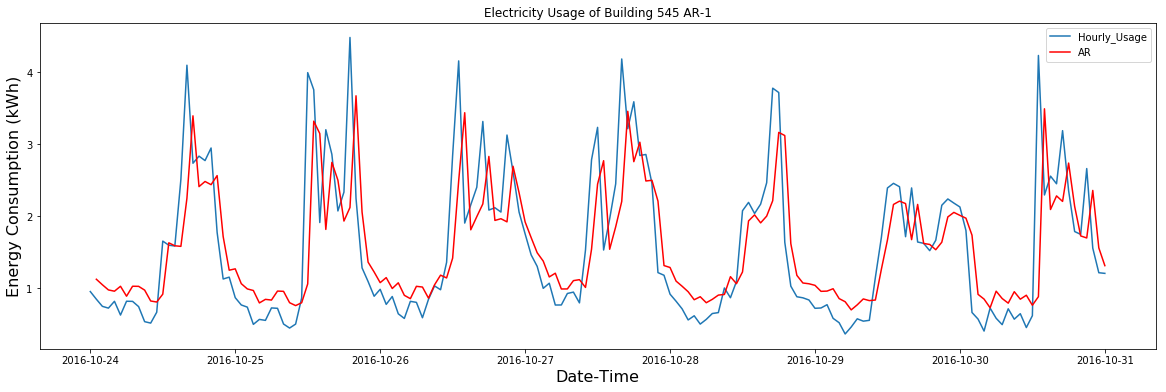

In [47]:
plot_ar_model(df, AR1_model, 1, 545)

AR-2

In [12]:
AR2_model= sm.tsa.AR(df.Hourly_Usage, freq="H").fit(maxlag=5)
print(AR2_model.params)

const              0.564026
L1.Hourly_Usage    0.741793
L2.Hourly_Usage   -0.095407
L3.Hourly_Usage    0.100761
L4.Hourly_Usage    0.231107
L5.Hourly_Usage   -0.312700
dtype: float64


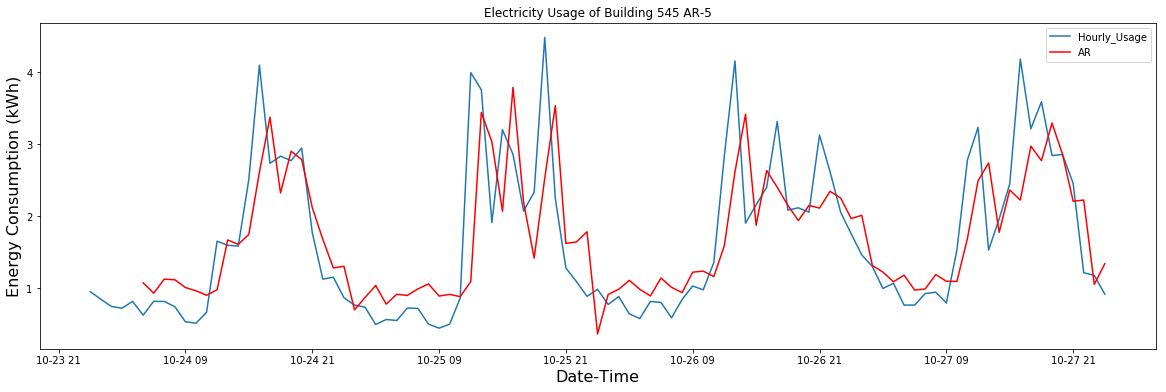

In [13]:
plot_ar_model(df, AR2_model, 5, 545)

AR-3

In [32]:
AR3_model = sm.tsa.AR(df.Hourly_Usage, freq="H").fit(maxlag=24)
print(AR3_model.params)

const               0.213765
L1.Hourly_Usage     0.594137
L2.Hourly_Usage    -0.061095
L3.Hourly_Usage     0.145935
L4.Hourly_Usage    -0.019981
L5.Hourly_Usage    -0.033454
L6.Hourly_Usage     0.018667
L7.Hourly_Usage     0.020307
L8.Hourly_Usage    -0.040094
L9.Hourly_Usage    -0.013881
L10.Hourly_Usage   -0.018976
L11.Hourly_Usage   -0.000256
L12.Hourly_Usage    0.010242
L13.Hourly_Usage   -0.009204
L14.Hourly_Usage   -0.015714
L15.Hourly_Usage   -0.027364
L16.Hourly_Usage   -0.052044
L17.Hourly_Usage    0.073398
L18.Hourly_Usage    0.012050
L19.Hourly_Usage   -0.037299
L20.Hourly_Usage    0.064093
L21.Hourly_Usage    0.044422
L22.Hourly_Usage    0.049699
L23.Hourly_Usage    0.190322
L24.Hourly_Usage   -0.018916
dtype: float64


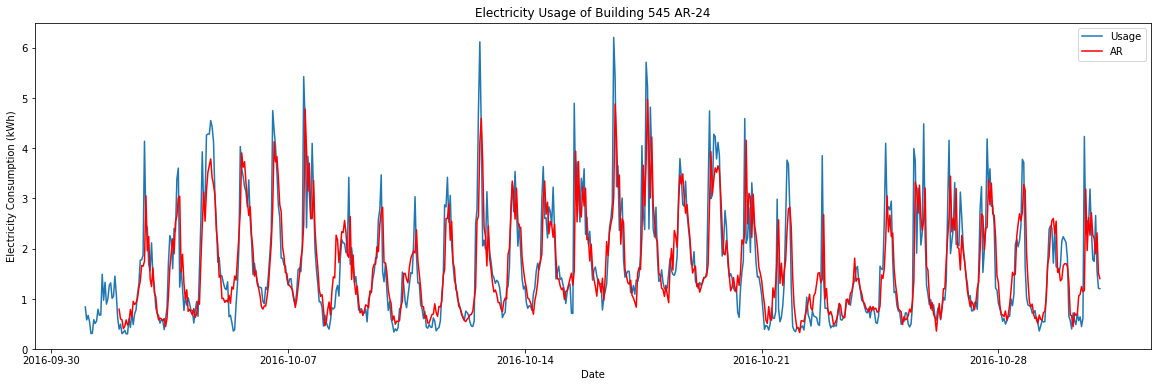

In [33]:
plot_ar_model(df, AR3_model, 24, 545)

## MA models

In [14]:
#function to plot MA time series model with actual usage
def plot_ma_model(data, y_select, ma_value, building_name):

    x = data.index
    y_true = data.Hourly_Usage

    #plot actual usage
    plt.subplots(1,1,figsize=(20,6))
    plt.plot(x,y_true, label='Hourly_Usage')

    x_pred = x
    y_pred = y_select

    #plot model prediction with MA10
    plt.plot(x_pred,y_pred, color='red', label='MA')

    plt.title("Electricity Usage of Building {} MA-{}".format(building_name, ma_value))
    plt.xlabel("Date-Time", fontsize=16)
    plt.ylabel("Electricity Consumption (kWh)", fontsize=16)
    # plt.yscale('log')
    plt.legend()

In [15]:
df["Hourly_Usage_MA10"] = pd.stats.moments.rolling_mean(df.Hourly_Usage, window=10, center=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=True).mean()
  """Entry point for launching an IPython kernel.


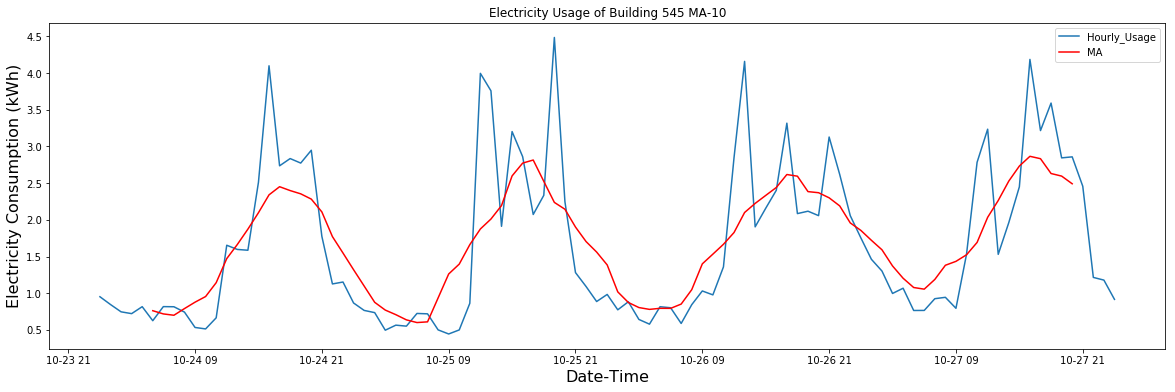

In [16]:
plot_ma_model(df, df["Hourly_Usage_MA10"], 10, 545)

EWMA

In [84]:
ewma= pd.stats.moments.ewma(df, halflife=5)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,adjust=True,halflife=5,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


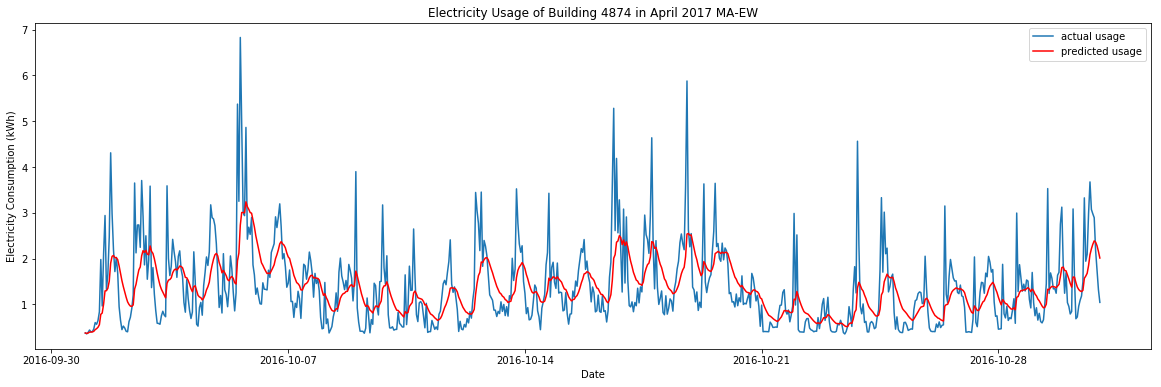

In [85]:
plot_ma_model(df, ewma['Hourly_Usage'], 'EW', 4874)